In [ ]:
#@title
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [441]:
class MultiLayerNN:
   
    def __init__(self,epochs,learning_rate):
        self.layers=[]
        self.epochs=epochs
        self.lr=learning_rate
        self.activations={
            'sigmoid':[self.sigmoid,self.sigmoid_derivate],
            'relu':[self.relu,self.relu_derivate]
        }
        self.error=[]
    
    def sigmoid(self,f):
        return 1/(1+np.exp(-f))
    
    def sigmoid_derivate(self,predicted):
        return predicted*(1-predicted)
    
    def relu(self,f):
        for i in range(f.shape[0]):
            for j in range(f.shape[1]):
                if(f[i][j]<0):
                    f[i][j]=0
        return f

    
    def relu_derivate(self,predicted):
        for i in range(predicted.shape[0]):
            for j in range(predicted.shape[1]):
                if(predicted[i][j]<0):
                    predicted[i][j]=0
                if(predicted[i][j]>0):
                    predicted[i][j]=1

        return predicted
    
    def forwardpass(self,X,y):
        samples,features=X.shape
        input_data=X
        for i in range(len(self.layers)):
            layer=self.layers[i]
            layer.input=input_data.dot(layer.weights)+layer.bias
            layer.output=self.activations[layer.activation][0](layer.input)
            input_data=layer.output
        
        return self.layers[-1].output
        
    def backpropagation(self,X,y,y_predicted):
        layer0,layer1=self.layers[0],self.layers[1]
        #======================
        dLoss_predicted=self.Loss_derivate(y,y_predicted)
        dPredicted_input=self.activations[layer1.activation][1](y_predicted)
        delta=dLoss_predicted*dPredicted_input
        output_hidden=self.layers[0].output
            
        dLoss_dw_output=output_hidden.T.dot(delta)
        dloss_dbias_out=delta
        #====================================== update

        self.layers[1].weights-=dLoss_dw_output*self.lr
        self.layers[1].bias-=np.sum(-(dloss_dbias_out*self.lr),axis=0,keepdims=True)
        #======================================
        output_weights=self.layers[1].weights
        #print(X.T.shape,delta.shape,output_weights.T.shape,(self.activations[layer0.activation][1](output_hidden)).shape)
        dLoss_weights_hidden=X.T.dot(delta.dot(output_weights.T)*self.activations[layer0.activation][1](output_hidden))
        #print(X.T.shape,delta.shape,output_weights.T.shape,output_hidden.shape)
        dloss_dbias_h=delta.dot(output_weights.T)*self.activations[layer0.activation][1](output_hidden)
        #======================================== update
        self.layers[0].weights-=dLoss_weights_hidden*self.lr
        self.layers[0].bias-=np.sum(-(dloss_dbias_h*self.lr),axis=0,keepdims=True)
        
        
    def Loss(self,y,y_predicted):
        return 0.5*(y-y_predicted)**2
    
    def Loss_derivate(self,y,y_predicted):
        return y_predicted-y
        
    def fit(self,X,y):
        for _ in tqdm(range(self.epochs)):
            y_predicted=self.forwardpass(X,y)
            self.error.append(self.binary_cross_entropy(y,y_predicted))
            self.backpropagation(X,y.reshape(-1,1),y_predicted)
            
   
    def binary_cross_entropy(self,y,y_predicted):
        return -(1/len(y))*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
    
    def predict(self,X):
        input_data=X
        for i in range(len(self.layers)):
            layer=self.layers[i]
            layer.input=input_data.dot(layer.weights)+layer.bias
            layer.output=self.activations[layer.activation][0](layer.input)
            input_data=layer.output
        
        return self.layers[-1].output
        


In [442]:
class Layer:
    def __init__(self,input_size,number_neuron,activation):
        self.weights=np.random.rand(input_size,number_neuron)
        self.bias=np.zeros((1,number_neuron))
        self.input=np.zeros(number_neuron)
        self.output=np.zeros(number_neuron)
        self.activation=activation

In [469]:
model=MultiLayerNN(50000,0.01)

In [470]:
model.layers=[Layer(2,20,"sigmoid"),
              Layer(20,1,"sigmoid")]

In [471]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),dtype=int)

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [474]:
model.fit(X_train,y_train)

100%|██████████| 50000/50000 [00:31<00:00, 1588.82it/s]


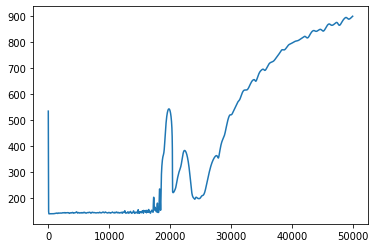

In [475]:
plt.plot(np.arange(model.epochs),model.error)

In [476]:
for i in range(2):
    print("weight : ",model.layers[i].weights," bias : ",model.layers[i].bias)

weight :  [[-12.23164443 -10.7825878    2.66336447   1.56224759   3.29414605
   10.08225858 -10.26705264  19.380957   -17.33531284  -9.62863454
   12.77689226  10.82163422  45.64231286   0.73448116  11.47615929
  -25.25570054   9.23870543   8.40385507   1.72309727  20.08142927]
 [  8.75422158   5.75090845  -2.6398184   -0.68795357  -3.35039332
  -11.17254317  10.45939513 -10.24996659  27.65761112 -18.56071655
   -7.68344705 -16.18692069 -13.12982195   1.87188154 -17.95389972
  -21.32096805  -6.00355687 -16.42238221   2.07765562  12.08513316]]  bias :  [[ 1.73637057e+01  1.50786276e+01 -3.95484143e-01  2.36780198e-02
  -5.01640789e-02  1.69051304e+01  1.73446117e+01  2.26016965e+01
  -3.25225242e+01 -2.32465981e+01  1.73169707e+01 -2.16474831e+01
  -4.91203720e+01  1.13406792e+00 -2.31975317e+01  3.53237147e+01
   1.38501351e+01  2.00338185e+01 -6.52085673e-01  2.54215155e+01]]
weight :  [[ -1.88626319]
 [ -2.31338126]
 [ -0.11342274]
 [  0.48820837]
 [ -0.45537172]
 [ -4.87092082]
 [ -

In [479]:
y_predicted=model.predict(X_test)

In [480]:
y_predicted=[1 if x>=0.5 else 0 for x in y_predicted]

In [481]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss
from mlxtend.plotting import plot_decision_regions

In [482]:
confusion_matrix(y_test,y_predicted)

array([[44,  2],
       [24, 29]])

In [483]:
roc_auc_score(y_test,y_predicted)

0.7518457752255948

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'MultiLayerNN')

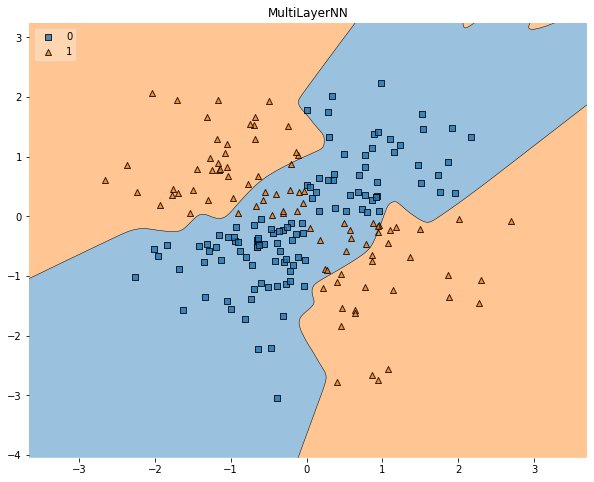

In [484]:
fig = plt.figure(figsize=(10,8)) 
fig = plot_decision_regions(X=X_train, y=y_train, clf=model, legend=2) 
plt.title("MultiLayerNN")